<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.svm import SVC
import cv2
from sklearn.model_selection import KFold

In [0]:
positive_names = ['p0'+str(i)+'.png' if i<10 else 'p'+str(i)+'.png' for i in np.arange(1,31)]
negative_names = ['n0'+str(i)+'.png' if i<10 else 'n'+str(i)+'.png' for i in np.arange(1,31)]

positive_ims = np.array([np.array(Image.open(img)) for img in positive_names])
negative_ims = np.array([np.array(Image.open(img)) for img in negative_names])

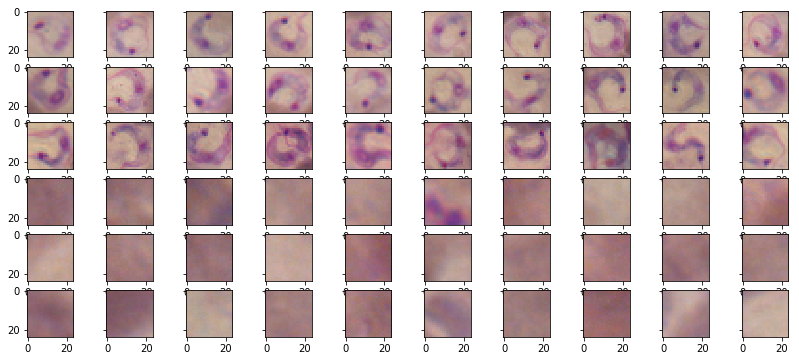

In [3]:
fig, ax = plt.subplots(6,10, figsize=(14, 6), sharey=True)
for i in range(len(positive_ims)):
  ax[int(i/10)][i%10].imshow(positive_ims[i])
for j in range(len(negative_ims)):
  counter = j + i + 1
  ax[int(counter/10)][counter%10].imshow(negative_ims[j])  
plt.show()

In [4]:
num_items = 20
test = np.arange(0,300).reshape(30,-1)
random_choices = np.random.choice(30, num_items, replace=False)

print(random_choices)

def get_canny_edge_detector(imgs):
  im = cv2.imread(imgs, cv2.IMREAD_GRAYSCALE)
  return cv2.Canny(im,100,200)

def get_features_array(data, edge_imgs):
  #m = np.mean(data, axis=(1,2))
  var = np.var(data, axis=(1,2))
  edge_mean = np.mean(edge_imgs, axis=(1,2))
  #return np.append(m, var, edge_mean, axis=1)
  #return np.c_[m, var, edge_mean]
  return np.c_[var, edge_mean]

positive_edges = np.array([get_canny_edge_detector(imageName) for imageName in positive_names])
negative_edges = np.array([get_canny_edge_detector(imageName) for imageName in negative_names])
#print(X)
#print(y)

[ 1 15 11  2  5  3 21 12 19  7 22 18 14 17  4  8 25 23 16 28]


In [0]:
def preprocess_data(choices):
  number_of_items = len(choices)

  X = get_features_array(positive_ims[choices], positive_edges[choices])
  y = [1] * number_of_items

  X = np.append(X, get_features_array(negative_ims[choices], negative_edges[choices]), axis=0)
  y = np.append(y, [0] * number_of_items)
  return X,y

In [0]:
def execute_N_split(funct):
  n_splits = 5
  number_of_items = len(positive_ims)
  kf = KFold(n_splits)
  acc = 0.0
  for train_index, test_index in kf.split(range(number_of_items)):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, y_train = preprocess_data(train_index)
    X_test, y_test = preprocess_data(test_index)
    #print(len(X_train))
    acc += funct(X_train, y_train, test_index)
  print('accuracy is {}'.format(acc * 100 /n_splits))

In [0]:
#print(clf.predict([[-0.8, -1]]))
def predict(clf, validation_index):
  positive_pred = clf.predict(get_features_array(positive_ims[validation_index], positive_edges[validation_index]))
  negative_pred = clf.predict(get_features_array(negative_ims[validation_index], negative_edges[validation_index]))
  acc = np.sum(positive_pred == 1)
  acc = acc + np.sum(negative_pred == 0)
  #print('accuracy is {}'.format(acc/60 * 100))
  return acc/(len(validation_index) + len(validation_index))
  #print('--------------------------positive_pred---------------------')
  #print(positive_pred)
  #print('--------------------------negative_pred----------------------')
  #print(negative_pred)

# Radial kernel

In [8]:
def Radial_kernel(X_train, y_train, test_index):
  clf = SVC(C=1.0, gamma=1e-4)
  clf.fit(X_train, y_train)
  return predict(clf, test_index)
  #print(clf)
execute_N_split(Radial_kernel)

accuracy is 96.66666666666666


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='sigmoid'), param_grid=param_grid, cv=cv)
data_X, data_y = preprocess_data(np.arange(30))
grid.fit(data_X, data_y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1e-06} with a score of 1.00


# Linear kernel

In [10]:
def linear_kernel(X_train, y_train, test_index):
  clf = SVC(kernel='linear', gamma=1e-5)
  clf.fit(X_train, y_train)
  return predict(clf, test_index)
#clf.support_vectors_
execute_N_split(linear_kernel)

accuracy is 96.66666666666666


# Polynomial Kernel

In [11]:
def polynomial_kernel(X_train, y_train, test_index):
  clf = SVC(gamma=0.0001, kernel='poly', C= 0.001)
  clf.fit(X_train, y_train)
  return predict(clf, test_index)
execute_N_split(polynomial_kernel)
#clf.support_vectors_

accuracy is 96.66666666666667


# Sigmoidal Kernel

In [12]:
def sigmoidal_kernel(X_train, y_train, test_index):
  clf = SVC(gamma=1e-06, kernel='sigmoid')
  clf.fit(X_train, y_train)
  return predict(clf, test_index)
#clf.support_vectors_
execute_N_split(sigmoidal_kernel)

accuracy is 96.66666666666667
